In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read the timeseries of monthly temperature

In [2]:
df=pd.read_csv('Time_series.txt',delimiter=' ')
df

,mon,tem
0,1,-0.9
1,2,0.2
2,3,3.8
3,4,10.1
4,5,15.3
...,...,...
3068,3069,13.8
3069,3070,8.3
3070,3071,7.7
3071,3072,7.1


The dataset includes monthly temperature since January 1760

## Make a scatter plot depicting Temp vs time 


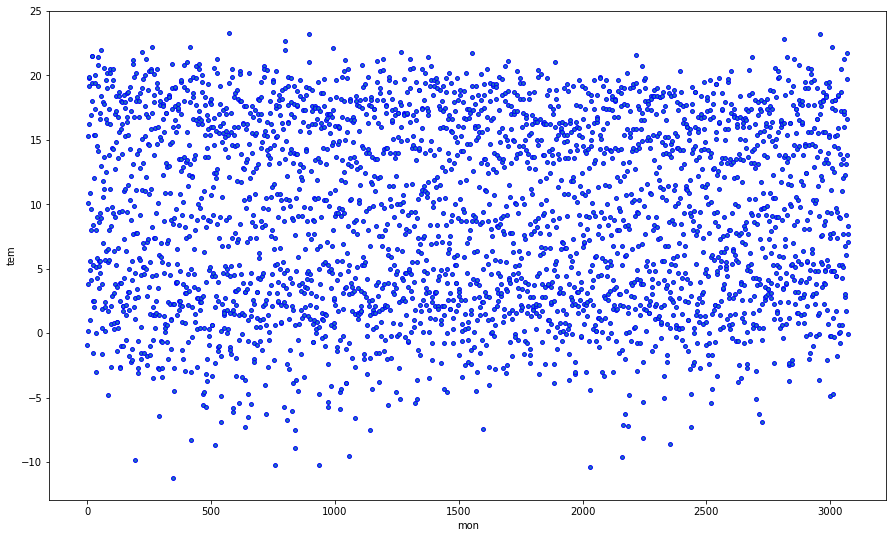

In [3]:
df.plot.scatter(x='mon',y='tem', facecolors='none', edgecolors='b',s=15,marker='o',figsize=(15,9));

In [4]:
# Convert the months from digits to months starting from January 1760 
df['date']=np.arange(np.datetime64('1760-01'), np.datetime64('2016-02'))
df

,mon,tem,date
0,1,-0.9,1760-01-01
1,2,0.2,1760-02-01
2,3,3.8,1760-03-01
3,4,10.1,1760-04-01
4,5,15.3,1760-05-01
...,...,...,...
3068,3069,13.8,2015-09-01
3069,3070,8.3,2015-10-01
3070,3071,7.7,2015-11-01
3071,3072,7.1,2015-12-01


<AxesSubplot:xlabel='date', ylabel='tem'>

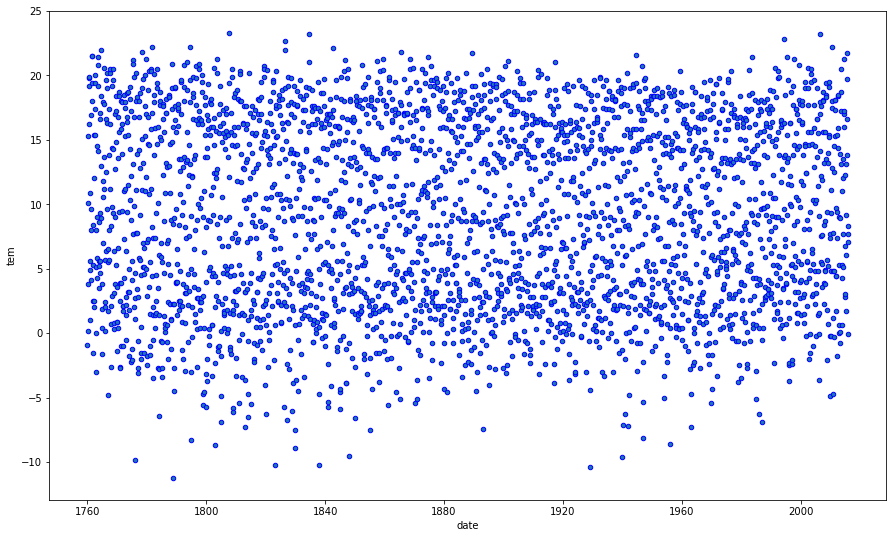

In [5]:
df.plot.scatter(x='date',y='tem',facecolors='none', edgecolors='b',figsize=(15,9))

## Add linear regression to the plot

In [6]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
X=df.iloc[:,0].values.reshape(-1, 1)
Y=df.iloc[:,1].values.reshape(-1, 1)
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
df["Temp_linear_reg"]=Y_pred

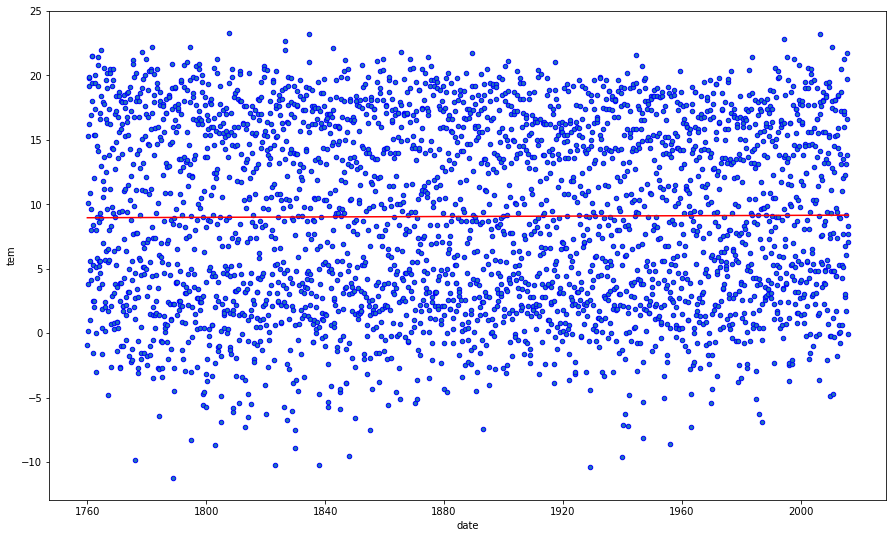

In [7]:
fig,ax=plt.subplots(figsize=(15,9))
df.plot.scatter(x='date',y='tem',facecolors='none', edgecolors='b',ax=ax)
plt.plot(df['date'], Y_pred, color='red')
plt.show()

# Seasonality and trend

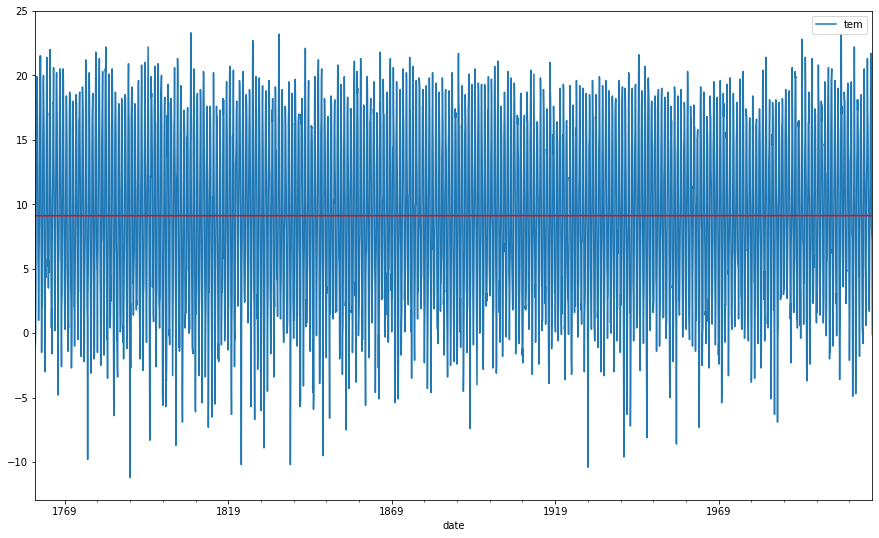

In [8]:
# linear trend
fig,ax=plt.subplots(figsize=(15,9))
df.plot.line(x='date',y='tem',ax=ax)
plt.plot(df['date'], Y_pred, color='red')
plt.show()

## Simple moving average for the period from 1980 until today

In [9]:
df_1980=df[df.index[df['date'] == '1980-01-01'].tolist()[0]:]
df_1980 = df_1980.reset_index(drop=True)
df_1980.set_index('date',inplace=True)

df_1980

,mon,tem,Temp_linear_reg
date,,,
1980-01-01,2641,-3.5,9.125861
1980-02-01,2642,1.2,9.125926
1980-03-01,2643,2.6,9.125991
1980-04-01,2644,7.1,9.126056
1980-05-01,2645,11.7,9.126121
...,...,...,...
2015-09-01,3069,13.8,9.153612
2015-10-01,3070,8.3,9.153677
2015-11-01,3071,7.7,9.153742


In [10]:
#Calculating Simple Moving Average over one year
df_1980['SMA12'] = df_1980['tem'].rolling(12).mean()
df_1980.dropna(inplace=True)

df_1980

,mon,tem,Temp_linear_reg,SMA12
date,,,,
1980-12-01,2652,1.6,9.126574,7.916667
1981-01-01,2653,-0.8,9.126639,8.141667
1981-02-01,2654,0.9,9.126704,8.116667
1981-03-01,2655,6.9,9.126769,8.475000
1981-04-01,2656,8.1,9.126834,8.558333
...,...,...,...,...
2015-09-01,3069,13.8,9.153612,10.566667
2015-10-01,3070,8.3,9.153677,10.233333
2015-11-01,3071,7.7,9.153742,10.308333


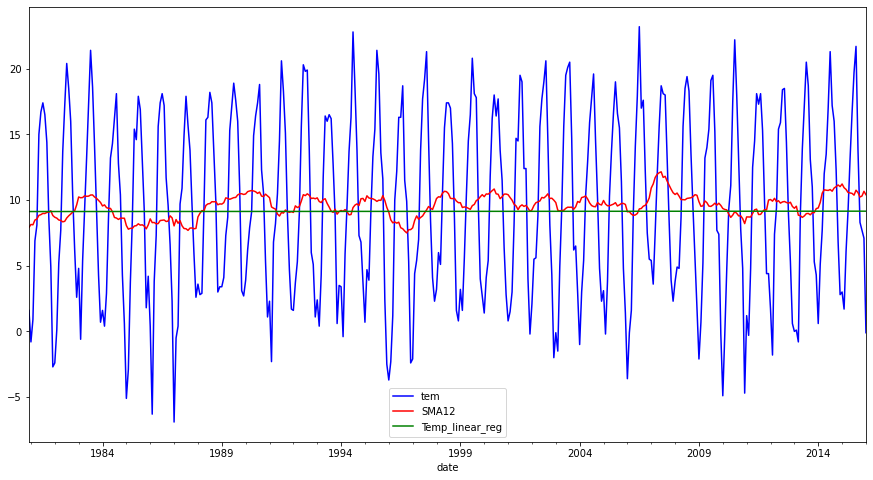

In [12]:
fig,ax=plt.subplots(figsize=(15,8))

df_1980.plot.line(y=['tem','SMA12','Temp_linear_reg'],color=['blue', 'red', 'green'],ax=ax)
plt.show()

In [13]:
#Calculating Exponential moving average (EMA) over one year
df_1980['EWMA12'] = df_1980['tem'].ewm(span=12).mean()
#df_1980.dropna(inplace=True)

df_1980

,mon,tem,Temp_linear_reg,SMA12,EWMA12
date,,,,,
1980-12-01,2652,1.6,9.126574,7.916667,1.600000
1981-01-01,2653,-0.8,9.126639,8.141667,0.300000
1981-02-01,2654,0.9,9.126704,8.116667,0.534180
1981-03-01,2655,6.9,9.126769,8.475000,2.543621
1981-04-01,2656,8.1,9.126834,8.558333,4.053269
...,...,...,...,...,...
2015-09-01,3069,13.8,9.153612,10.566667,13.256973
2015-10-01,3070,8.3,9.153677,10.233333,12.494362
2015-11-01,3071,7.7,9.153742,10.308333,11.756768


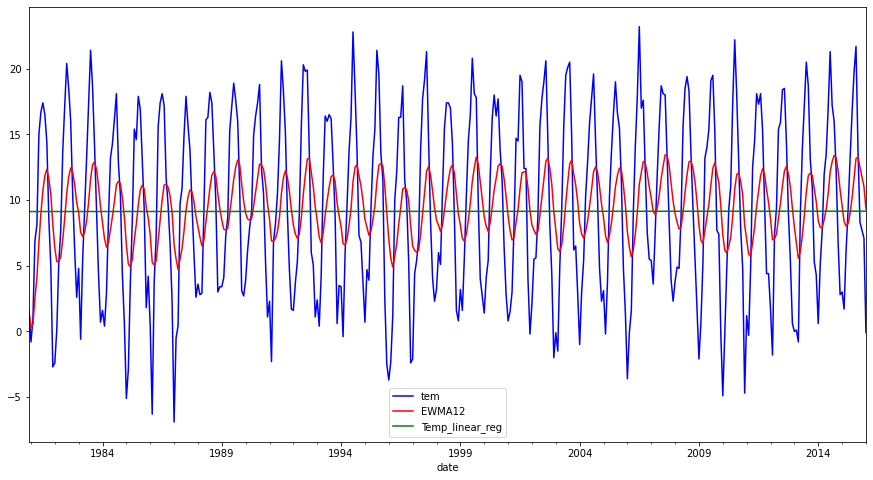

In [14]:
fig,ax=plt.subplots(figsize=(15,8))

df_1980.plot.line(y=['tem','EWMA12','Temp_linear_reg'],color=['blue', 'red', 'green'],ax=ax)
plt.show()

for more information, please check https://www.geeksforgeeks.org/how-to-calculate-moving-average-in-a-pandas-dataframe/

## Time series decomposition

A useful abstraction for selecting forecasting methods is to break a time series down into systematic and unsystematic components.

- Systematic: Components of the time series that have consistency or recurrence and can be described and modeled.
- Non-Systematic: Components of the time series that cannot be directly modeled.

A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

- Level: The average value in the series.
- Trend: The increasing or decreasing value in the series.
- Seasonality: The repeating short-term cycle in the series.
- Noise: The random variation in the series

- All series have a level and noise. The trend and seasonality components are optional.
- It is helpful to think of the components as combining either additively or multiplicatively.



In [15]:
# use data from 1900 until today
df_1900=df[df.index[df['date'] == '1900-01-01'].tolist()[0]:]
df_1900 = df_1900.reset_index(drop=True)
df_1900.set_index('date',inplace=True)
df_1900

,mon,tem,Temp_linear_reg
date,,,
1900-01-01,1681,0.9,9.063616
1900-02-01,1682,1.3,9.063681
1900-03-01,1683,1.9,9.063746
1900-04-01,1684,7.7,9.063811
1900-05-01,1685,12.9,9.063875
...,...,...,...
2015-09-01,3069,13.8,9.153612
2015-10-01,3070,8.3,9.153677
2015-11-01,3071,7.7,9.153742


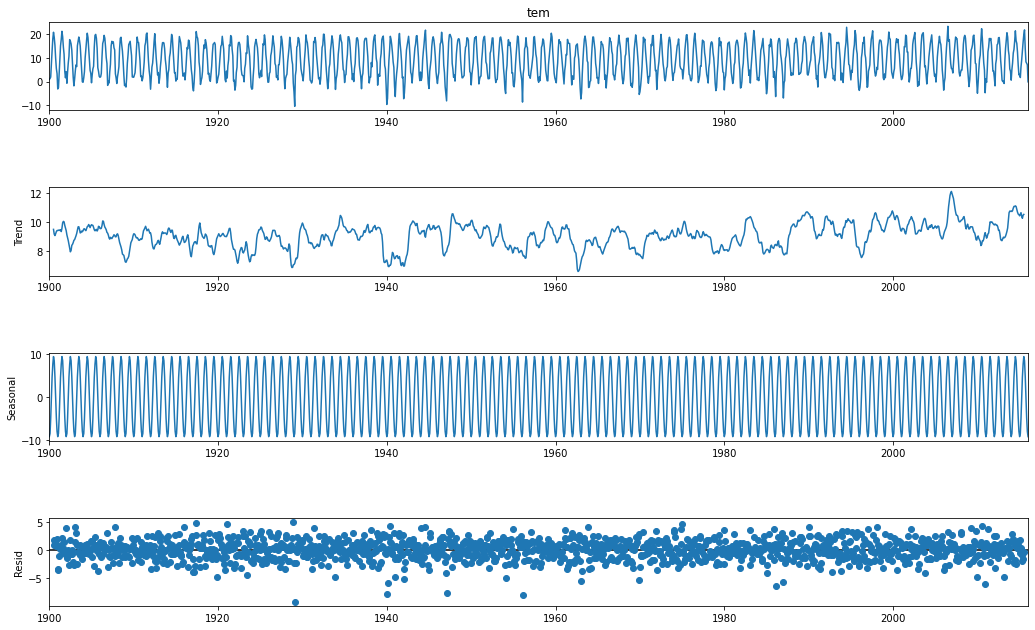

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_1900['tem'], model='additive')
fig=result.plot()
fig.set_size_inches((16, 10))

#plt.show()

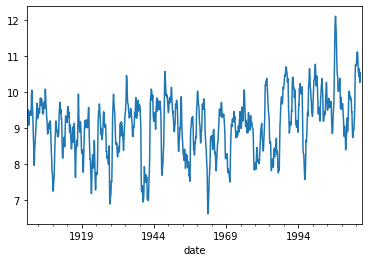

In [18]:
# to plot any of the plots seperately
result.trend.plot()
plt.show()

for more information, please check https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

## Auto correlation

These are plots that graphically summarize the strength of a relationship with an observation in a time series with observations at prior time steps

- The Pearson’s correlation coefficient is a number between -1 and 1 that describes a negative or positive correlation respectively. A value of zero indicates no correlation.

- We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.

- A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.

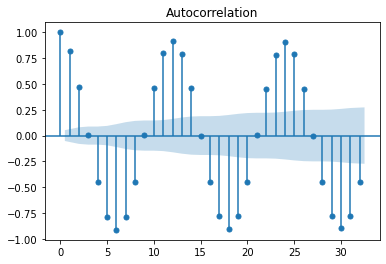

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_1900['tem'])
plt.show()

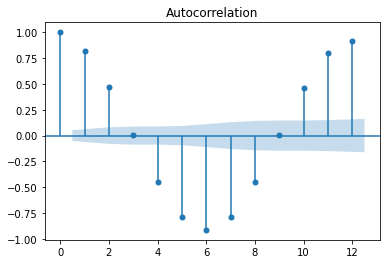

In [20]:
# change the lags to consider only 12 months 
plot_acf(df_1900['tem'],lags=12)
plt.show()

## Partial Autocorrelation Function


The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags

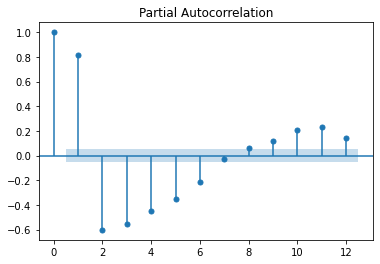

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_1900['tem'], lags=12)
plt.show()

More information check https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

## lag scatter plot

A lag plot is a special type of scatter plot with the two variables (X,Y) “lagged.”

A “lag” is a fixed amount of passing time; One set of observations in a time series is plotted (lagged) against a second, later set of data. The kth lag is the time period that happened “k” time points before time i. For example:
Lag1(Y2) = Y1 and Lag4(Y9) = Y5.
The most commonly used lag is 1, called a first-order lag plot.



### Lag plots allow you to check for:

- Model suitability.
- Outliers (data points with extremely high or low values).
- Randomness (data without a pattern).
- Serial correlation (where error terms in a time series transfer from one period to another).
- Seasonality (periodic fluctuations in time series data that happens at regular periods).


for more information check here
https://www.statisticshowto.com/lag-plot/#google_vignette

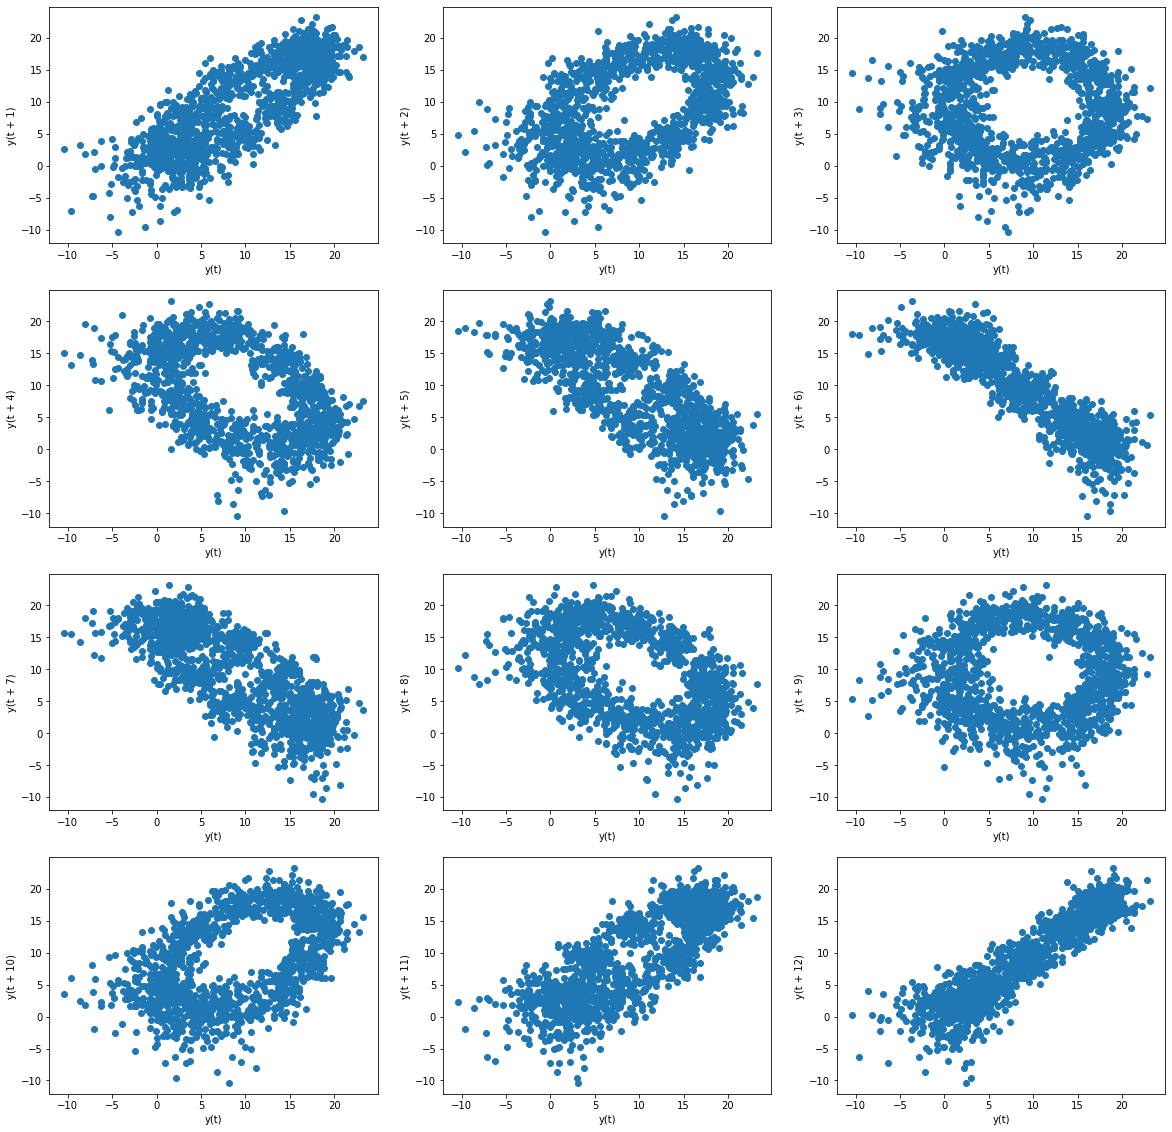

In [22]:
fig, ax= plt.subplots(4,3,figsize=(20,20))
ax=ax.ravel()
for i in range(1,13):
    #print(i)
    pd.plotting.lag_plot(df_1900['tem'], lag=i,ax=ax[i-1])
plt.show()    

## AutoRegressive Integrated Moving Average (ARIMA) models 

ARIMA model is widely used for analyzing and forecasting time series data.

This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

- AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations. 
- I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
- MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

The parameters of the ARIMA (p,d,q) model are defined as follows:

- p: The number of lag observations included in the model, also called the lag order.
- d: The number of times that the raw observations are differenced, also called the degree of differencing.
- q: The size of the moving average window, also called the order of moving average

You can set a parameter to a value of 0 to indicate that a particular element of the model should not be used. This allows you to configure the ARIMA model to function as an ARMA model, or even a basic AR, I, or MA model.






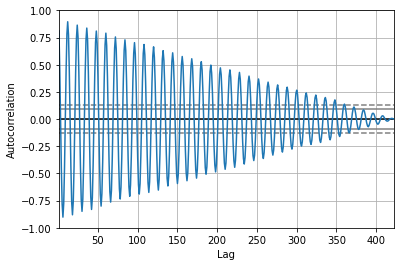

In [23]:
# autocorrelation plot of the time series
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_1980['tem'])
plt.show()

In [24]:
df_1980

,mon,tem,Temp_linear_reg,SMA12,EWMA12
date,,,,,
1980-12-01,2652,1.6,9.126574,7.916667,1.600000
1981-01-01,2653,-0.8,9.126639,8.141667,0.300000
1981-02-01,2654,0.9,9.126704,8.116667,0.534180
1981-03-01,2655,6.9,9.126769,8.475000,2.543621
1981-04-01,2656,8.1,9.126834,8.558333,4.053269
...,...,...,...,...,...
2015-09-01,3069,13.8,9.153612,10.566667,13.256973
2015-10-01,3070,8.3,9.153677,10.233333,12.494362
2015-11-01,3071,7.7,9.153742,10.308333,11.756768


In [25]:
# fit model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_1980['tem'], order=(5,1,0))
model_fit = model.fit()

C:\tools\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\tools\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\tools\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [26]:
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    tem   No. Observations:                  422
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1063.380
Date:                Mon, 15 May 2023   AIC                           2138.761
Time:                        12:52:45   BIC                           2163.017
Sample:                    12-01-1980   HQIC                          2148.347
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1345      0.042      3.173      0.002       0.051       0.218
ar.L2          0.2799      0.043      6.499      0.000       0.195       0.364
ar.L3          0.1018      0.043      2.394      0.0

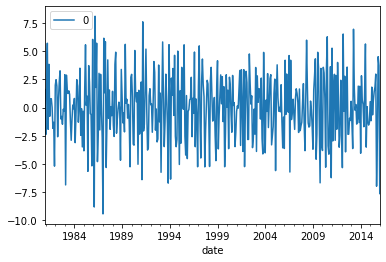

In [27]:
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()


Next, we get a density plot of the residual error values, suggesting the errors are Gaussian, and centered on zero.



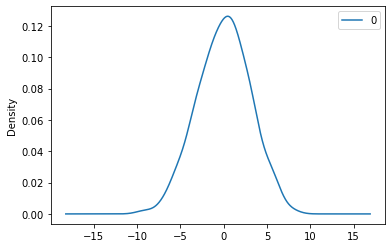

In [28]:
# density plot of residuals
residuals.plot(kind='kde')
plt.show()

We have a mean close to zero which indicates that there is no bias

In [29]:
# summary stats of residuals
print(residuals.describe())

                0
count  422.000000
mean     0.015112
std      3.026505
min     -9.442547
25%     -2.035530
50%      0.124376
75%      2.020448
max      8.114562


In [30]:
# Forcast
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [31]:
# split into train and test sets
X = df_1980['tem'].values
X

array([ 1.6, -0.8,  0.9,  6.9,  8.1, 15. , 16.7, 17.4, 16.5, 14.4,  8.6,
        4.9, -2.7, -2.4,  0.1,  5.2,  7.7, 13.7, 17.2, 20.4, 18.5, 16. ,
       10.4,  6.2,  2.6,  4.8, -0.6,  5.4,  9.3, 13.2, 17.4, 21.4, 18.6,
       14.1,  9.2,  4.3,  0.7,  1.6,  0.4,  2.9,  8.6, 13.2, 14.3, 16.2,
       18.1, 12.8, 10.4,  4.3,  0.6, -5.1, -2.9,  3.7,  8.5, 15.4, 14.6,
       17.9, 16.9, 13.1,  9.2,  1.8,  4.2,  0.4, -6.3,  3.8,  7.3, 15.6,
       17.4, 18.1, 17.2, 11.7,  9.6,  6.6,  2.3, -6.9, -0.5,  0.4,  9.7,
       10.9, 14.9, 17.9, 15.7, 13.8,  9.7,  5.9,  2.6,  3.6,  2.8,  2.9,
        9.2, 16.1, 16.3, 18.2, 17.4, 13.7,  9.9,  3. ,  3.4,  3.4,  4.1,
        7.3,  8.7, 15.3, 17.1, 18.9, 17.6, 16. , 10.9,  3.1,  2.7,  3.9,
        6.2,  7.9,  9.1, 14.9, 16.4, 17.4, 18.8, 12.3, 10.5,  5.3,  1.1,
        2.3, -2.3,  6.8,  8.2, 10.5, 14.5, 20.6, 18.3, 15.1,  9. ,  4.7,
        1.7,  1.6,  3.7,  5.3,  9. , 15.6, 20.3, 19.8, 19.9, 13.8,  6. ,
        5.1,  1.1,  2.4,  0.4,  4.3, 11.7, 16.4, 16

In [32]:
size = int(len(X) * 0.66)

In [33]:
train, test = X[0:size], X[size:len(X)]


In [34]:
history = [x for x in train]

In [35]:
predictions = list()


In [36]:
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=2.431514, expected=3.000000
predicted=5.588869, expected=5.400000
predicted=7.344445, expected=10.300000
predicted=14.690002, expected=12.900000
predicted=15.400292, expected=15.900000
predicted=15.114302, expected=17.700000
predicted=16.631830, expected=19.600000
predicted=17.847346, expected=14.500000
predicted=12.616558, expected=10.100000
predicted=6.434296, expected=4.800000
predicted=1.014546, expected=2.300000
predicted=0.655559, expected=3.100000
predicted=5.420353, expected=-0.200000
predicted=2.731887, expected=3.800000
predicted=6.387729, expected=10.300000
predicted=12.807851, expected=13.700000
predicted=17.025643, expected=16.600000
predicted=18.865148, expected=19.000000
predicted=16.920518, expected=16.600000
predicted=13.508351, expected=15.500000
predicted=12.626056, expected=11.400000
predicted=8.381231, expected=4.800000
predicted=2.293402, expected=1.400000
predicted=-0.038432, expected=-3.600000
predicted=-4.289656, expected=-0.100000
predicted=2.231564,

In [37]:
# evaluate forecasts
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 2.996


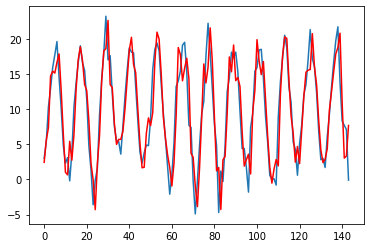

In [39]:
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [40]:
# plot forecasts against actual outcomes on the whole timeseries
# Here we fill the values in the prediction column for the taining data with nan
arr_empty=np.zeros(len(train))
arr_empty[:] = np.nan
df_1980['prediction']=np.append(arr_empty,predictions)
df_1980

,mon,tem,Temp_linear_reg,SMA12,EWMA12,prediction
date,,,,,,
1980-12-01,2652,1.6,9.126574,7.916667,1.600000,NaN
1981-01-01,2653,-0.8,9.126639,8.141667,0.300000,NaN
1981-02-01,2654,0.9,9.126704,8.116667,0.534180,NaN
1981-03-01,2655,6.9,9.126769,8.475000,2.543621,NaN
1981-04-01,2656,8.1,9.126834,8.558333,4.053269,NaN
...,...,...,...,...,...,...
2015-09-01,3069,13.8,9.153612,10.566667,13.256973,20.793785
2015-10-01,3070,8.3,9.153677,10.233333,12.494362,10.973585
2015-11-01,3071,7.7,9.153742,10.308333,11.756768,3.032468


<AxesSubplot:xlabel='date'>

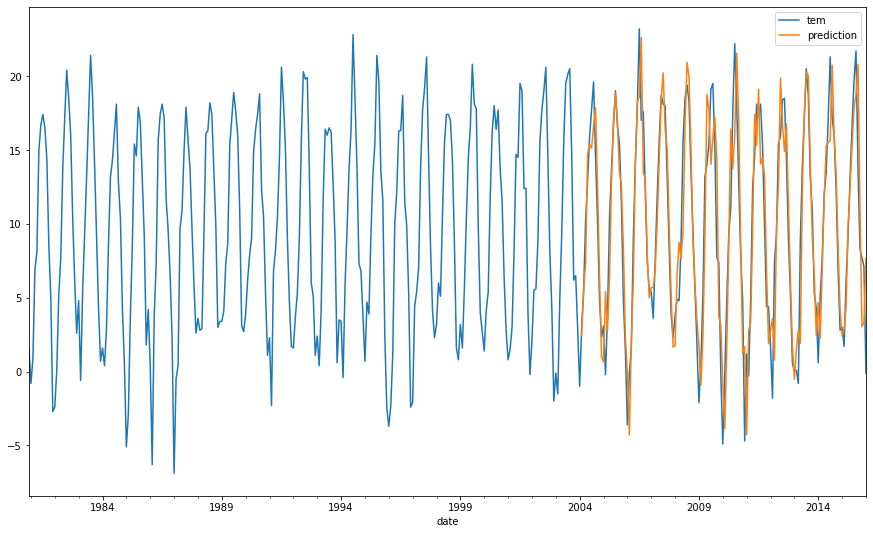

In [41]:
df_1980.plot(y=['tem','prediction'], use_index=True,figsize=(15,9))

The model prediction is good as shown in the above plot. The model could also improve by tuning the parameters p,d,and q

For more information, please check https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

# Trend test

In [344]:
! pip install pymannkendall

In [42]:
df_1900

,mon,tem,Temp_linear_reg
date,,,
1900-01-01,1681,0.9,9.063616
1900-02-01,1682,1.3,9.063681
1900-03-01,1683,1.9,9.063746
1900-04-01,1684,7.7,9.063811
1900-05-01,1685,12.9,9.063875
...,...,...,...
2015-09-01,3069,13.8,9.153612
2015-10-01,3070,8.3,9.153677
2015-11-01,3071,7.7,9.153742


## Mann–Kendall test

Mann-Kendall Trend Test is used to determine whether or not a trend exists in time series data. It is a non-parametric test, meaning there is no underlying assumption made about the normality of the data.

The purpose of the Mann-Kendall score is to statistically assess if there is a monotonic upward or downward trend of the variable of interest over time. A monotonic upward (or downward) trend means that the variable consistently increases (or decreases) through time, but the trend might or might not be linear.



it can be done by using the pymannkendall python package as follow:

In [43]:
import pymannkendall as mk
print(mk.original_test(df_1900['tem'], alpha=0.05))

Mann_Kendall_Test(trend='no trend', h=False, p=0.1457597233301866, z=1.4546733157160372, Tau=0.026016783424511723, s=25224.0, var_s=300650918.6666667, slope=0.000641613198900091, intercept=8.553437213565537)


- Ho(Accepted): There is no trend present in the data.(p-value>0.05)
- Ha(Rejected): A trend is present in the data.

The output interpretation can be done in the following different ways:

- trend: This tells the trend-increasing, decreasing, or no trend.
- h: True if the trend is present. False if no trend is present.
- p: The p-value of the test.
- z: The normalized test statistic.
- Tau: Kendall Tau.
- s: Mann-Kendal’s score
- var_s: Variance S
- slope: Theil-Sen estimator/slope
- intercept: Intercept of Kendall-Theil Robust Line

### There are several versions for Mann–Kendall test

In [44]:
print(mk.hamed_rao_modification_test(df_1900['tem'],lag=12))


Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='no trend', h=False, p=0.15724972140442306, z=1.4143821731942303, Tau=0.026016783424511723, s=25224.0, var_s=318024026.60638136, slope=0.000641613198900091, intercept=8.553437213565537)


In [45]:
print(mk.yue_wang_modification_test(df_1900['tem'],lag=12))


Modified_Mann_Kendall_Test_Yue_Wang_Approach(trend='no trend', h=False, p=0.1664809979869477, z=1.3835999032020816, Tau=0.026016783424511723, s=25224.0, var_s=332332208.65762967, slope=0.000641613198900091, intercept=8.553437213565537)


In [46]:
print(mk.trend_free_pre_whitening_modification_test(df_1900['tem']))


Modified_Mann_Kendall_Test_Trend_Free_PreWhitening_Approach(trend='increasing', h=True, p=0.030400119203097598, z=2.164837665789769, Tau=0.038732161597130985, s=37498.0, var_s=300014589.3333333, slope=0.000641613198900091, intercept=8.553437213565537)


In [47]:
print(mk.seasonal_test(df_1900['tem'],period=12))


Seasonal_Mann_Kendall_Test(trend='increasing', h=True, p=9.967668332944157e-07, z=4.89227569877104, Tau=0.08867707969459554, s=7108.0, var_s=2110332.0, slope=0.007142857142857133, intercept=8.585714285714285)


more information are found
- https://www.geeksforgeeks.org/how-to-perform-a-mann-kendall-trend-test-in-python/
- https://abhinaya-sridhar-rajaram.medium.com/mann-kendall-test-in-python-for-trend-detection-in-time-series-bfca5b55b
-https://up-rs-esp.github.io/mkt/